# Q5) This randomly chooses  amongst a list of n numbers using relative clock drift

In [5]:
import struct
import time
import matplotlib.pyplot as plt
def lastbit(f):
    return struct.pack('!f', f)[-1] & 1

def getrandbits(k):
    "Return k random bits using a relative drift of two clocks."
    # assume time.sleep() and time.clock() use different clocks
    # though it might work even if they use the same clock
    #XXX it does not produce "good" random bits, see below for details
    result = 0
    for i in range(k):
        time.sleep(0)
        result <<= 1
        #print("Result--->",result)
        result |= lastbit(time.clock())
        #print("Result--->",result)
    return result

def randint(a, b):
    "Return random integer in range [a, b], including both end points."
    return (a + randbelow(b - a + 1))

def randbelow(n):
    "Return a random int in the range [0,n).  Raises ValueError if n<=0."
    # from Lib/random.py
    if n <= 0:
       raise ValueError
    k = n.bit_length()  # don't use (n-1) here because n can be 1
    #print("bit length",k)
    r = getrandbits(k)          # 0 <= r < 2**k
    while r >= n: # avoid skew
        r = getrandbits(k)
    return r
randnums=[]
for i in range(1000):
    rand=randint(0,100)
    randnums.append(rand)
#print(randnums)

# 5.b) Their distribution is plotted. I do get a roughly uniform distribution.

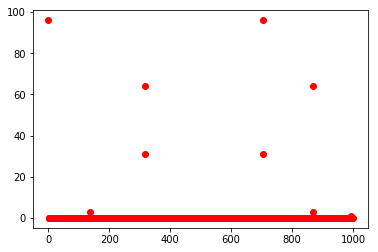

In [6]:
nums = list(range(len(randnums)))
plt.plot(nums, randnums, 'ro')
plt.show()